# Tests

## 1. Importing libs

In [21]:
from utils import predict_visualize
from unet import build_unet 
from hrnet import build_hrnet
from hrnetv1 import build_hrnet_v1
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

path = 'kiti//testing//image_2' 

In [22]:

def class_wise_metrics(y_true, y_pred,n_classes=30):
  '''
  Computes the class-wise IOU and Dice Score.

  Args:
    y_true (tensor) - ground truth label maps
    y_pred (tensor) - predicted label maps
  '''
  y_pred = np.argmax(y_pred, axis=-1)
  y_true = np.argmax(y_true, axis=-1)
  class_wise_iou = []
  class_wise_dice_score = []

  smoothing_factor = 0.00001

  for i in range(n_classes):
    intersection = np.sum((y_pred == i) * (y_true == i))
    y_true_area = np.sum((y_true == i))
    y_pred_area = np.sum((y_pred == i))
    combined_area = y_true_area + y_pred_area
    
    iou = (intersection) / (combined_area - intersection + smoothing_factor)
    class_wise_iou.append(iou)
    
    dice_score =  2 * ((intersection) / (combined_area + smoothing_factor))
    class_wise_dice_score.append(dice_score)
  mean_iou=np.mean(class_wise_iou)

  return mean_iou,class_wise_iou, class_wise_dice_score

def miou_score(y_true, y_pred):
    mean_iou,class_wise_iou, class_wise_dice_score = class_wise_metrics(y_true,y_pred)
    return mean_iou

# Unet
Trained on :
<ul>
<li>batch size 4 </li>
<li>epochs : 20 </li>
<li>Gpu : GTX 1650TI</li>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)


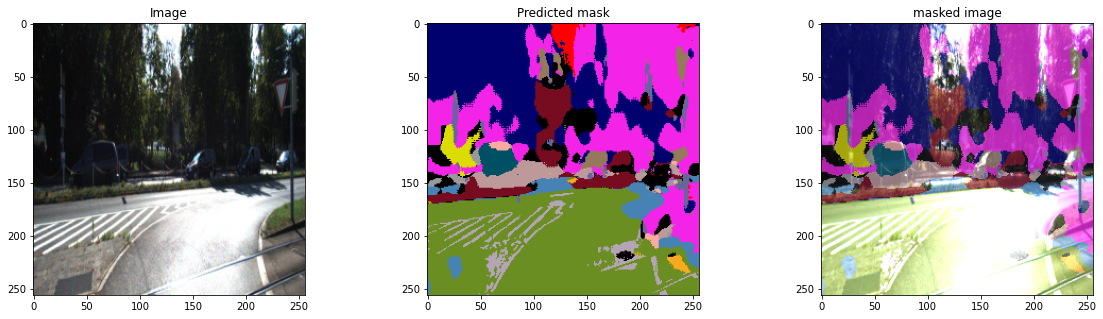

In [35]:
from unet import build_unet
unet = build_unet(input_shape=(256,256,3),weights='unet_20.hdf5')
x,y,z,h = predict_visualize('test_images\\000000_10.png',model=unet,image_size=(256,256,3),plot = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)


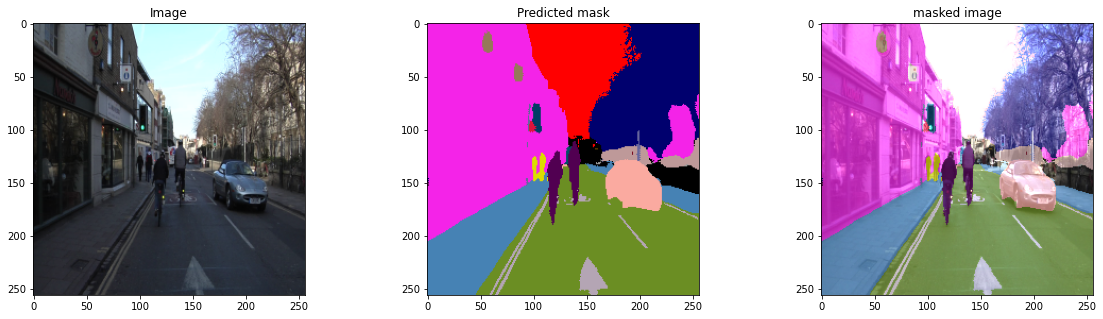

In [36]:
x,y,z,h = predict_visualize("test_images\\0016E5_08031.png",model = unet,image_size=(256,256,3),plot = True)

# Hrnet 1 - camvid
Trained on :
<ul>
<li>batch size 1 </li>
<li>epochs : 40 </li>
<li>Gpu : RTX2070</li>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


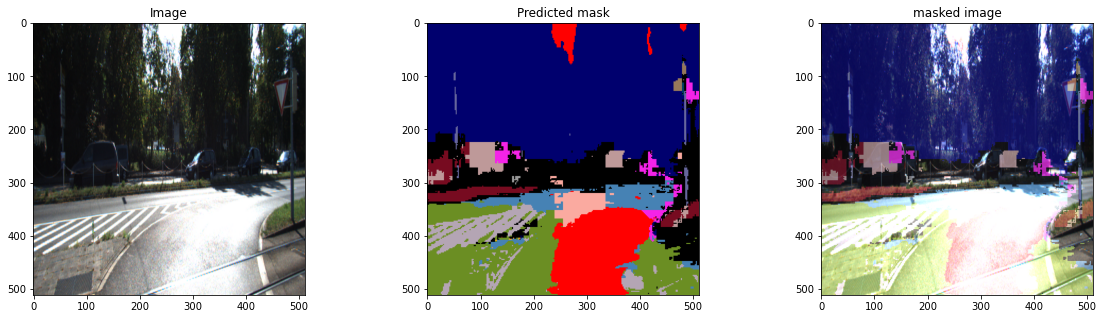

In [23]:
hrnet_1 = build_hrnet_v1(weights='hrnet.hdf5',n_classes=32)
x,y,z,h = predict_visualize('test_images\\000000_10.png',model = hrnet_1,image_size = (512,512,3),plot = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


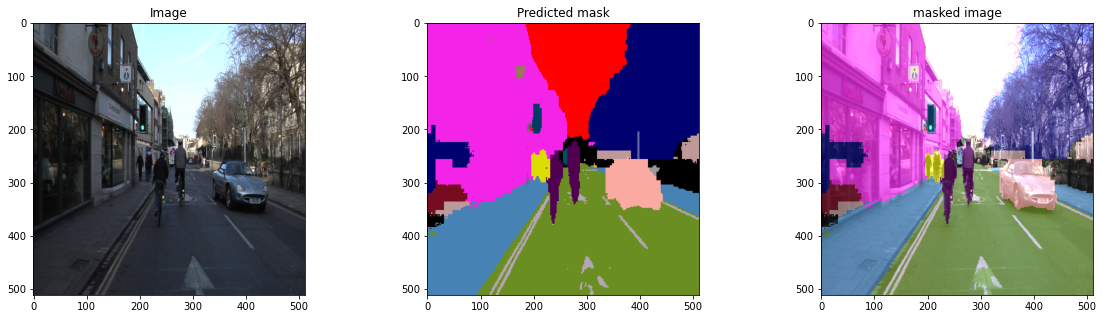

In [38]:
x,y,z,h = predict_visualize("test_images\\0016E5_08031.png",model = hrnet_1,image_size = (512,512,3),plot = True)

# Hrnet 2 - city scapes
Trained on :
<ul>
<li>batch size 4 </li>
<li>epochs : 30 </li>
<li>Gpu : Tesla K80</li>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


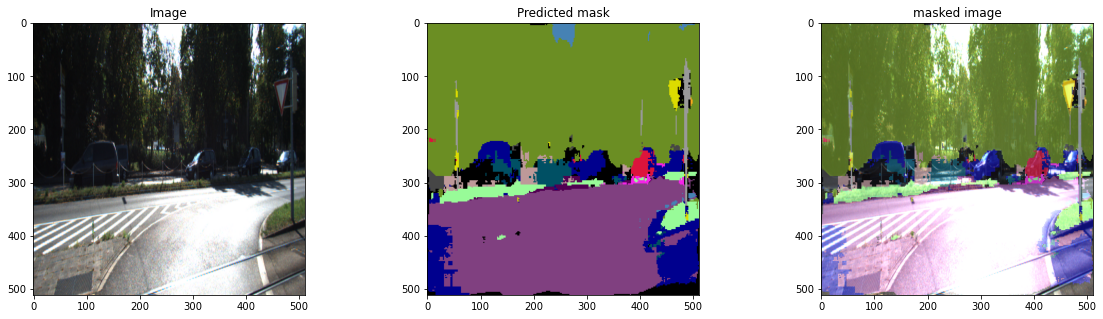

In [24]:
hrnet_1_1 = build_hrnet_v1(weights='hrnet_1.hdf5')
x,y,z,h = predict_visualize('test_images\\000000_10.png',model=hrnet_1_1,image_size=(512,512,3),plot = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


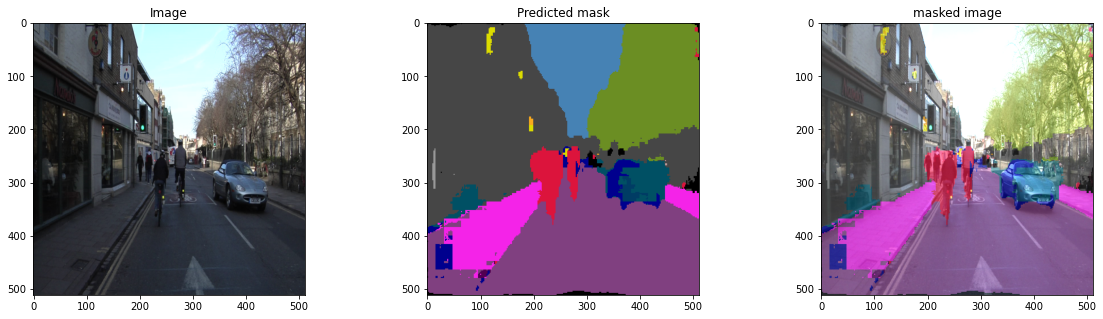

In [40]:
x,y,z,h = predict_visualize("images\\0016E5_08031.png",model = hrnet_1_1,image_size = (512,512,3),plot = True)

# Hrnet 3 - cityscapes
Trained on :
<ul>
<li>batch size 3 </li>
<li>added augmentation</li>
<li>epochs : 30 </li>
<li>Gpu : Tesla K80</li>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


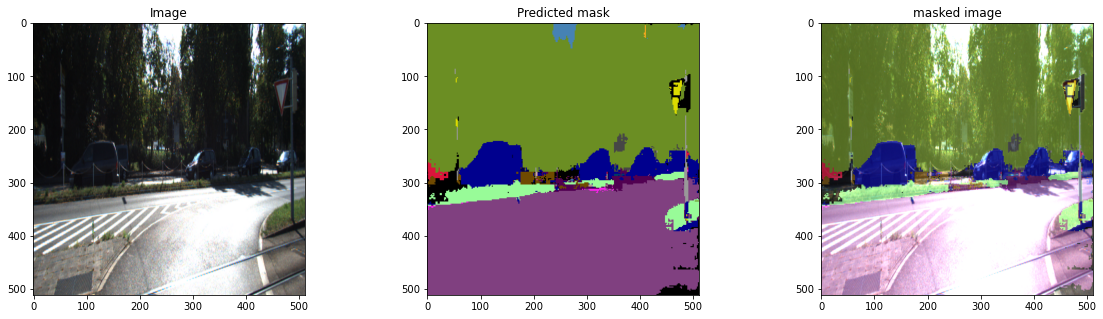

In [25]:
hrnet_2 = build_hrnet_v1(weights='hrnet_2.hdf5')
x,y,z,h = predict_visualize('test_images\\000000_10.png',model=hrnet_2,image_size=(512,512,3),plot = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


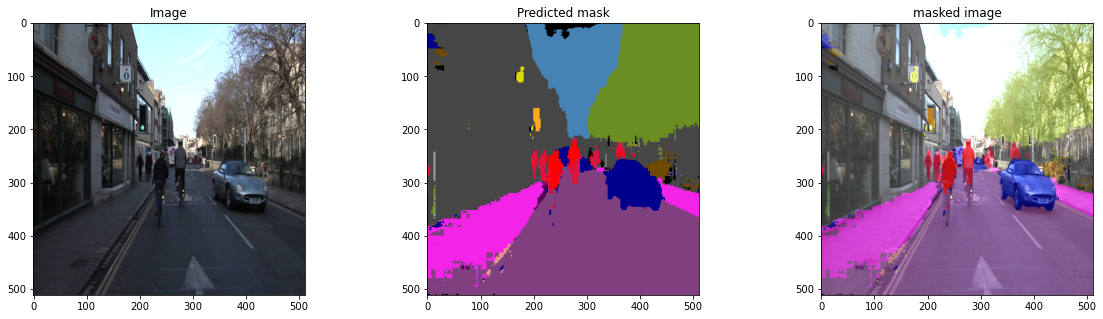

In [41]:
x,y,z,h = predict_visualize("test_images\\0016E5_08031.png",model = hrnet_2,image_size = (512,512,3),plot = True)

# Hrnet final - city scapes augmented with kiti

Trained on :
<ul>
<li>batch size 3 </li>
<li>changed dims = (256,512)</li>
<li>Added exponential decay learning rate scheduler</li>
<li>epochs : 30 </li>
<li>Gpu : Tesla K80</li>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 512, 3)


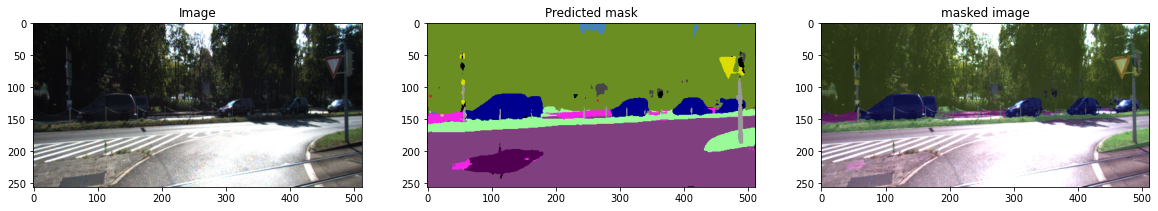

In [26]:
#\kiti\testing\image_2
hrnet_3 = build_hrnet(weights='hrnet_3.hdf5')
x,y,hot_1,h = predict_visualize('test_images\\000000_10.png',model=hrnet_3,image_size=(512,256,3),n_classes=30,plot = True, alpha=0.3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 512, 3)


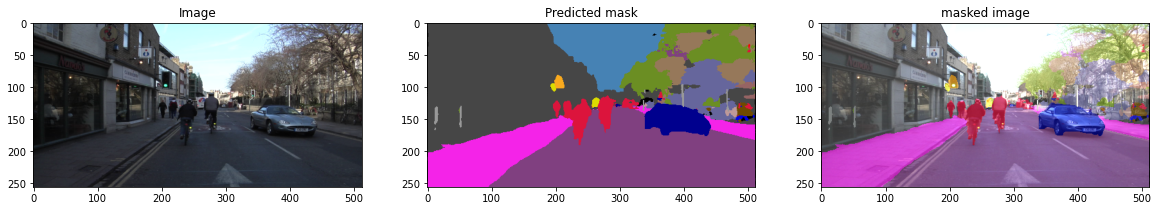

In [32]:
x,y,hot_1,h = predict_visualize("test_images\\0016E5_08031.png",model=hrnet_3,image_size=(512,256,3),n_classes=30,plot = True, alpha=0.7)

# Results :
<ol> 
    <li>Unet trained on CamVid dataset :</li>
        <ul> 
            <li>Didn't get good generalization results on unseen data (kiti dataset).</li>
            <li>Achieved good results on CamVid Test set. </li>
        </ul><br>
    <li>HRnet trained on Camvid Dataset : </li>
        <ul> 
            <li>Didn't get good generalization results on unseen data (kiti dataset).</li>
            <li>Achieved better results on CamVid Test set showing finer details better than Unet. </li>
        </ul><br>
    <li>HRnet trained on CityScapes Dataset : </li>
        <ul> 
            <li>Started getting generalization results on unseen data (kiti and CamVid dataset).</li>
        </ul><br>
    <li>HRnet trained on CityScapes Dataset <b>with augmentation</b> : </li>
        <ul> 
            <li>Achieved better generalization results on unseen data (kiti and CamVid dataset).</li>
        </ul><br>
    <li>HRnet trained on CityScapes and Kiti datasets : </li>
        <ul> 
            <li>Best generalization results on unseen data ( Kiti test set and CamVid dataset).</li>
        </ul><br>
</ol>